# The Network and Trajectories of Transitions 
# among Sentential Co-Occurrences of Noun Phrases in
# Plato's *Phaedrus*
## By Moses Boudourides & Sergios Lenis 

**IMPORTANT**: To use this notebook, you'll need to

1. Install IPython Notebook (easiest way: use [Anaconda](http://store.continuum.io))
2. Download this notebook and all other Python scripts used here from [https://github.com/mboudour/WordNets/blob/master/Plato_Phaedrus_Network&Trajectories.ipynb](https://github.com/mboudour/WordNets/blob/master/Plato_Phaedrus_Network&Trajectories.ipynb)
3. Run `ipython notebook` in the same directory where notebook and scripts were put

<a href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

### Importing Python Modules 

In [1]:
import random
import nltk
import codecs
from textblob import TextBlob
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import imp
from ipywidgets import widgets
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
%load_ext autoreload

## I. Importing the Text of Plato's *Phaedrus*

In [2]:
filename = 'Plato_Phaedrus1.txt'
titlename = "Plato's Phaedrus"

f = codecs.open(filename, "r", encoding="utf-8").read()

num_lines = 0
num_words = 0
num_chars = 0
for line in f:
    words = line.split()
    num_lines += 1
    num_words += len(words)
    num_chars += len(line)
print "%s has number of words = %i (and number of characters/symbols = %i)" %(titlename,num_words,num_chars)

blob = TextBlob(f)

Plato's Phaedrus has number of words = 102009 (and number of characters/symbols = 125944)


## II. Extracting the Most Frequent Noun Phrases in Plato's *Phaedrus*

In [3]:
all_sents=blob.sentences
occurdic=Counter()
for sen in all_sents:
    dd=sen.dict
    for np in dd['noun_phrases']:
        occurdic[np]+=1

df = pd.DataFrame(columns=["%s Noun Phrases" %titlename, "Frequencies"])
u=1
for l,v in occurdic.items(): 
    df.loc[u]=[l,v]
    u+=1

print "The total number of noun phrases in %s is %i." %(titlename,len(df))#len(npA))
df.sort(["Frequencies"], ascending=[0])

cut = 2
df = df[df['Frequencies']>cut].sort(["Frequencies"], ascending=[0])
print "The total number of noun phrases in %s with frequencies > %i is %i." %(titlename,cut,len(df))#len(npA))
df.sort(["Frequencies"], ascending=[0])

The total number of noun phrases in Plato's Phaedrus is 739.
The total number of noun phrases in Plato's Phaedrus with frequencies > 2 is 37.


,Plato's Phaedrus Noun Phrases,Frequencies
734,socrates,215.0
135,phaedrus,211.0
678,lysias,34.0
192,muses,11.0
737,god,9.0
299,zeus,7.0
677,true,5.0
540,well,5.0
441,fair youth,5.0
351,thamus,5.0


In [4]:
%autoreload 2

selectedTerms={}
excluded = ['who','will','exactly','enough','shall','suppose','well']
for k in df["Plato's Phaedrus Noun Phrases"].tolist(): #df["Plato's Phaedrus Noun Phrases"].tolist():
    if k not in excluded:
        selectedTerms[k] = k.capitalize()

# tool= imp.load_source('tools', utilsdir+'/tools.py')
import tools as tool
create_pandas_dataframe_from_text=tool.create_pandas_dataframe_from_text  
dfst,sec_prot,coccurlist,occurlist,dflines=create_pandas_dataframe_from_text(blob,selectedTerms,selectedTerms,titlename)
# print len(sec_prot.nodes()), sec_prot.nodes()
# dfst.sort_values(by='Frequencies').sort(["Frequencies"], ascending=[0])

prot_pol_sub=dflines[['protagonists','#_of_protagonists','polarity','subjectivity']].reset_index()
prot_pol_sub['sentence_id']=prot_pol_sub.index
prot_pol_sub=prot_pol_sub[['sentence_id','protagonists','#_of_protagonists','polarity','subjectivity']]

cuts = 1
# prot_pol_sub = prot_pol_sub[prot_pol_sub['#_of_protagonists']>cuts]
# lp = prot_pol_sub['protagonists'].tolist()
# lpn = []
# control_dic={}
# for i in lp:
#     for j in i:
#         lpn.append(j)
#         if j not in control_dic:
#             print j,'0, 1, 2'
#             control_dic[j]=int(raw_input())
# # print lpn
# # print control_dic
# # len(set(lpn))
# for nd in sec_prot.nodes():
#     if nd not in control_dic:
#         continue
#     dici=sec_prot.node[nd]
#     sec_prot.add_node(nd,attr_dic=dici,type=control_dic[nd])
print "The total number of sentences in %s with at least %i selected noun phrases in each one of them is %i." %(titlename,cuts+1,len(prot_pol_sub))
prot_pol_sub.rename(columns={'protagonists':'list_of_selected_noun_phrases','#_of_protagonists':'#_of_selected_noun_phrases'},inplace=True)
prot_pol_sub.sort(["#_of_selected_noun_phrases"], ascending=[0]) #.drop('sentence_id', 1)
ddff = prot_pol_sub.drop('sentence_id', 1)
ddff.index.name = 'sentence_id'
ddff

The total number of sentences in Plato's Phaedrus with at least 2 selected noun phrases in each one of them is 1142.


,list_of_selected_noun_phrases,#_of_selected_noun_phrases,polarity,subjectivity
sentence_id,,,,
0,[],0.0,0.000000,0.000000
1,[Phaedrus],1.0,0.400000,0.400000
2,[Ilissus],1.0,0.000000,0.000000
3,[Socrates],1.0,0.000000,0.000000
4,[Phaedrus],1.0,0.000000,0.000000
5,[Phaedrus],1.0,0.000000,0.000000
6,"[Acumenus, Lysias]",2.0,0.150000,0.491667
7,[Socrates],1.0,0.000000,0.000000
8,[],0.0,0.285714,0.535714


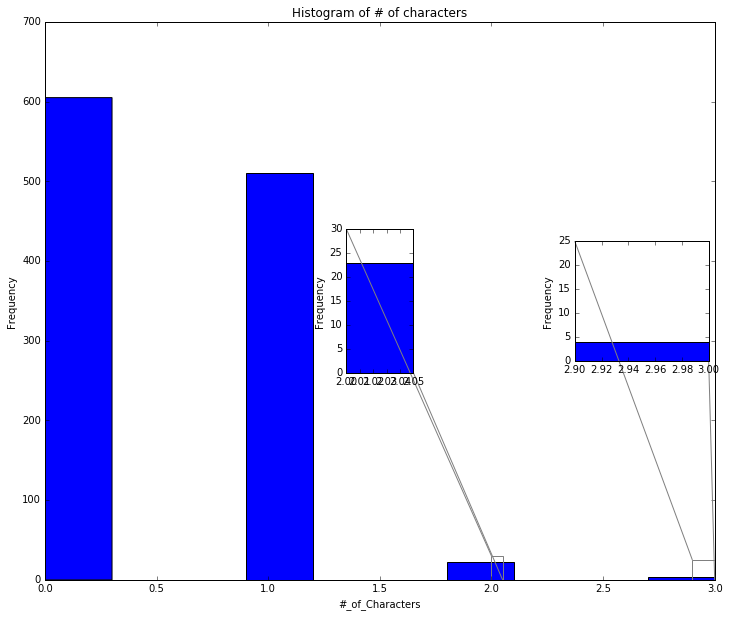

In [5]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

ndfl=dflines[dflines['#_of_protagonists']>0  ]

fig, ax = plt.subplots(figsize=[12, 10])
axes2 = zoomed_inset_axes(ax, 6, loc=5)  # zoom = 6

dflines['#_of_protagonists'].plot.hist(ax=ax)

ax.set_xlabel('#_of_Characters')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of # of characters')

x1, x2, y1, y2 = 2.9, 3., 0, 25
axes2.set_xlim(x1, x2)
axes2.set_ylim(y1, y2)
ndfl['#_of_protagonists'].plot.hist(ax=axes2)
axes2.set_ylabel('Frequency')

mark_inset(ax, axes2, loc1=2, loc2=4, fc="none", ec="0.5")
axes3 = zoomed_inset_axes(ax, 6, loc=10)

x1, x2, y1, y2 = 2, 2.05, 0, 30
axes3.set_xlim(x1, x2)
axes3.set_ylim(y1, y2)
ndfl['#_of_protagonists'].plot.hist(ax=axes3)
axes3.set_ylabel('Frequency')

mark_inset(ax, axes3, loc1=2, loc2=4, fc="none", ec="0.5")

plt.show()

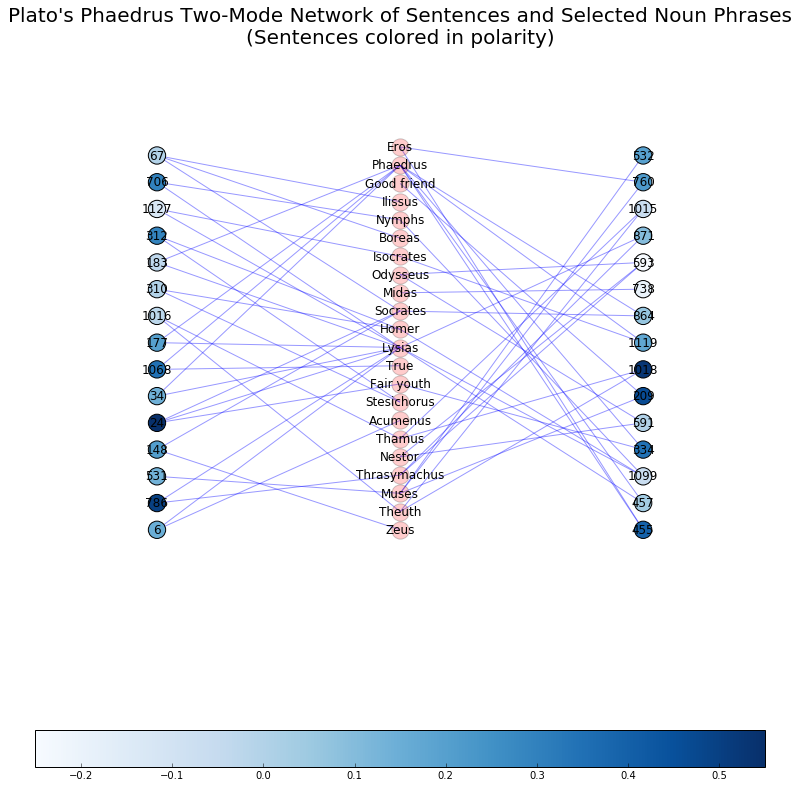

In [6]:
%autoreload 2

draw_network_node_color=tool.draw_network_node_color
sstt="%s Two-Mode Network of Sentences and Selected Noun Phrases" %titlename
pos=nx.spring_layout(sec_prot)
# pos=DefaultDict
nds=[nd for nd in sec_prot.nodes() if isinstance(nd,int)]
prot=[nd for nd in sec_prot.nodes() if nd not in nds]
# ncont=dict(control_dic)
# print ncont
# ncont[u'Midas']=0
# prot.append('Midas')
# protag=[nd for nd in prot if int(ncont[nd])==0 ]
# pos={nd:{0:0,1:0} for nd in sec_prot}
# nprotag=[nd for nd in prot if  int(ncont[nd])==1 or int(ncont[nd])==2]
# print protag
# print nprotag
for en,nd in enumerate(nds):
    if en<len(nds)/2.:
        pos[nd][0]=-1
        pos[nd][1]=en*2./len(nds)
    else:
        pos[nd][0]=1
        pos[nd][1]=(en-len(nds)/2.)*2./len(nds)
for en ,nd in enumerate(prot):
    pos[nd][0]=0
    pos[nd][1]=en*1./len(prot)
# for en ,nd in enumerate(protag):
#     pos[nd][0]=.5
#     pos[nd][1]=en*1./len(protag)
# for en ,nd in enumerate(nprotag):
#     pos[nd][0]=-.5
#     pos[nd][1]=en*1./len(nprotag)
# print pos    
possit=draw_network_node_color(sec_prot,sstt,pos=pos,with_edgewidth=False,withLabels=True,labfs=12,valpha=0.2,
                               ealpha=0.4,labelfont=15,with_node_weight=False,node_size_fixer=300.,node_col='polarity')

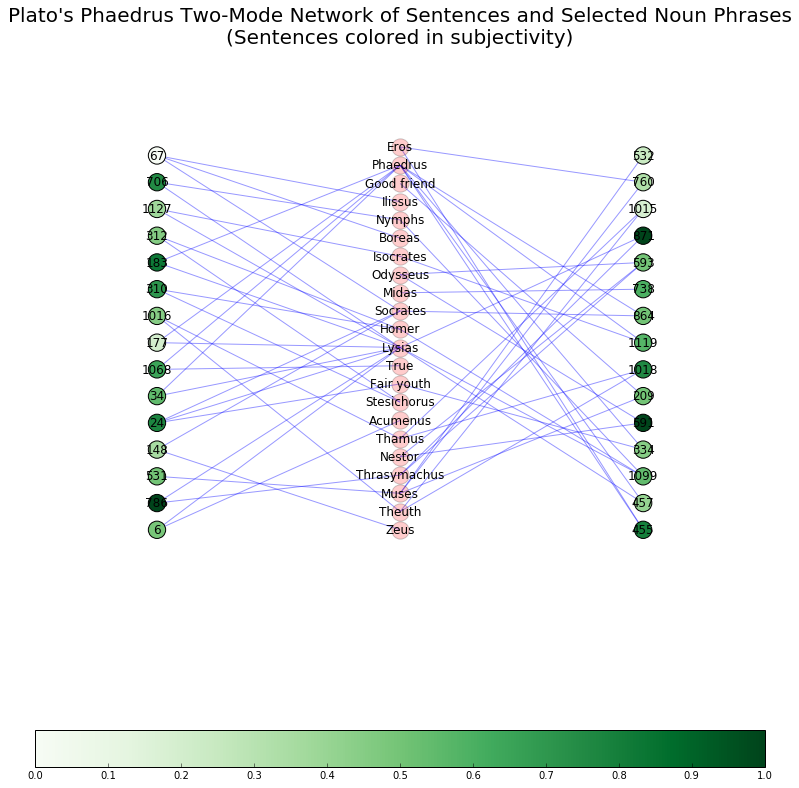

In [7]:
possit=draw_network_node_color(sec_prot,sstt,pos=pos,with_edgewidth=False,withLabels=True,labfs=12,valpha=0.2,
                               ealpha=0.4,labelfont=15,with_node_weight=False,node_size_fixer=300.,
                               node_col='subjectivity',colormat='Greens')

## III. Constructing the Network of Sententially Co-Occurring Noun Phrases in Plato's *Phaedrus*

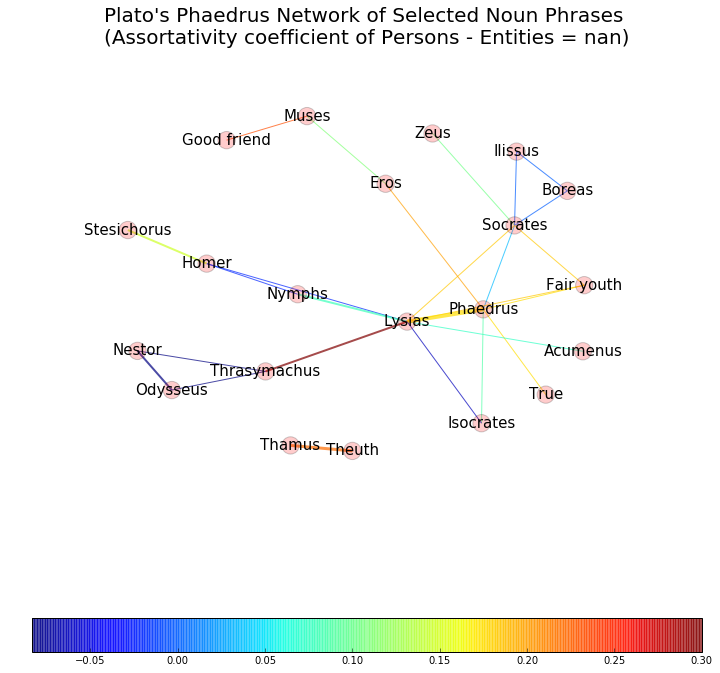

In [8]:
%autoreload 2

plist = prot_pol_sub['list_of_selected_noun_phrases'].tolist()
pplist=prot_pol_sub['polarity'].tolist()
nplist=prot_pol_sub['#_of_selected_noun_phrases'].tolist()
splist=prot_pol_sub['subjectivity'].tolist()

G = tool.make_graph_from_lists(plist,pplist,nplist,splist)
# print G.nodes(data=True)
# for nd in G.nodes():
#     G.add_node(nd,type=control_dic[nd])
posg=nx.spring_layout(G,scale=50)#,k=0.55)#,iterations=20)
# nodescolor={}
# npos={}
# d=40
# for nd in G.nodes():
#     opos=posg[nd]

#     if nd in protag:
#         nodescolor[nd]='r'
#         npos[nd]=[opos[0],opos[1]-d]
#     else:
#         nodescolor[nd]='g'
#         npos[nd]=[opos[0],opos[1]+d]
# npos={v:k for v,k in pos.items() if v in G}        

sstt="%s Network of Selected Noun Phrases \n(Assortativity coefficient of Persons - Entities = %.4f)" %(titlename,nx.attribute_assortativity_coefficient(G,'type'))
possit=tool.draw_network(G,sstt,pos=posg,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15,
                   with_edgecolor=True,edgecolor='polarity',colormat='Blues') #npos ,node_col=nodescolor False

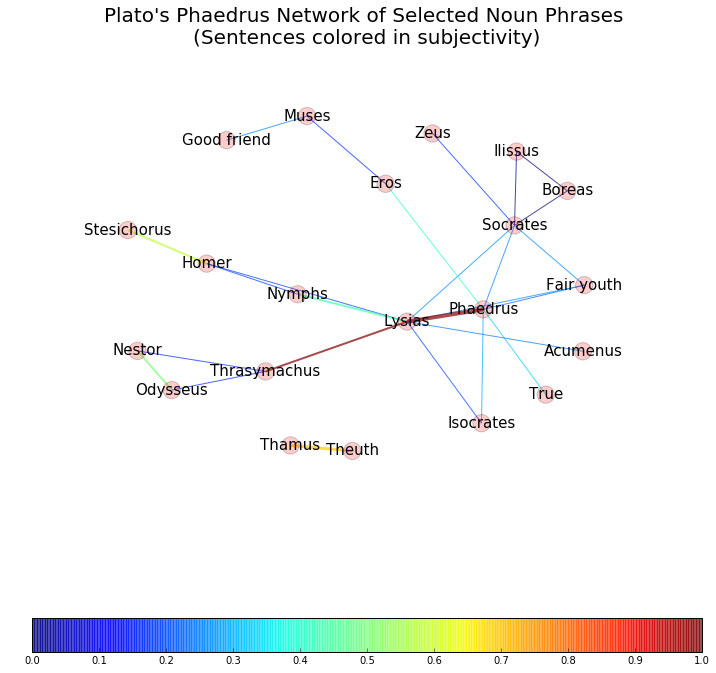

In [9]:
sstt="%s Network of Selected Noun Phrases \n(Sentences colored in subjectivity)" %titlename
possit=tool.draw_network(G,sstt,pos=posg,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15,
                   with_edgecolor=True,edgecolor='subjectivity',colormat='Greys')

## IV. Centralities of Nodes in the Network of Sententially Co-Occurring Noun Phrases in Plato's *Phaedrus*

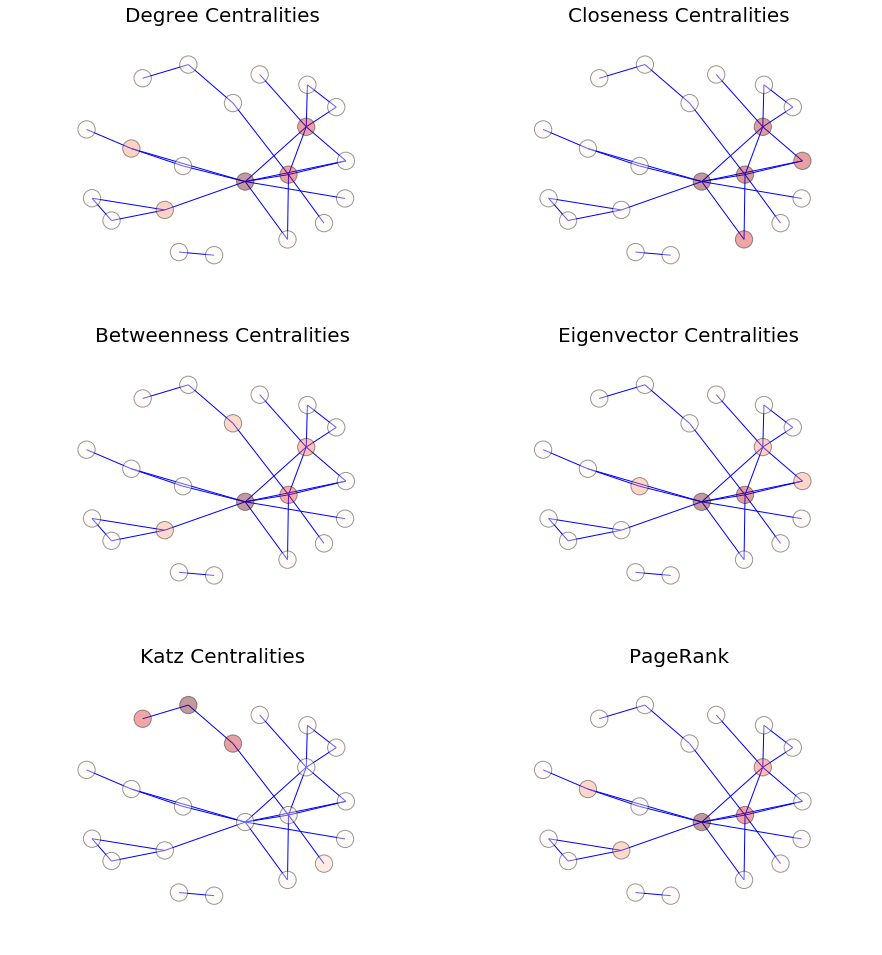

In [10]:
centrali=tool.draw_centralities_subplots(G,pos=posg,withLabels=False,labfs=5,figsi=(15,22),ealpha=1,vals=True)

### The table of Centralities of Nodes in the Network of Sententially Co-Occurring Noun Phrases in Plato's *Phaedrus*

In [11]:
dfc=pd.DataFrame()
u=0
for i,k in centrali.items():
    dfc.insert(u,i,k.values())
    u+=1
dfc.insert(0,'Nodes',centrali[centrali.keys()[0]].keys())
# dfc
# dfc.insert(0,'Nodes',centrali[centrali.keys()[0]].keys())
dfc.columns=['Nodes','Closeness_Centrality', 'Katz_Centrality','Betweenness_Centrality', 'PageRank', 'Eigenvector_Centrality','Degree_Centrality']
dfc=dfc[['Nodes','Degree_Centrality','Closeness_Centrality','Betweenness_Centrality','Eigenvector_Centrality','Katz_Centrality','PageRank']]

# cols = list(dfc.columns.values)
# print "Centralities of nodes of %s sorted by closeness and betweenness centralities:" %name 
# print
dfc.sort(['Betweenness_Centrality','Closeness_Centrality'], ascending=[0,0])

,Nodes,Degree_Centrality,Closeness_Centrality,Betweenness_Centrality,Eigenvector_Centrality,Katz_Centrality,PageRank
9,Lysias,0.40,0.522581,0.497368,4.904428e-02,-0.092672,0.029980
7,Phaedrus,0.30,0.476471,0.323684,8.613205e-02,0.085887,0.154722
12,Socrates,0.30,0.450000,0.247368,8.845425e-02,-0.193255,0.039802
14,Thrasymachus,0.15,0.368182,0.168421,2.190857e-01,-0.088619,0.050845
20,Eros,0.10,0.344681,0.168421,6.333739e-01,0.498552,0.037177
0,Homer,0.15,0.360000,0.089474,1.533181e-01,-0.053608,0.053733
6,Muses,0.10,0.261290,0.089474,1.451883e-02,0.634843,0.018958
19,Fair youth,0.15,0.415385,0.000000,2.265966e-01,-0.061308,0.026449
1,Isocrates,0.10,0.376744,0.000000,1.874343e-01,0.056198,0.017259
11,Nymphs,0.10,0.352174,0.000000,2.448529e-01,-0.084968,0.083404


## V. Communities of Nodes in the Network of Sententially Co-Occurring Noun Phrases in Plato's *Phaedrus*

Number of communities of Plato's Phaedrus Network of Selected Noun Phrases 
(Sentences colored in subjectivity) = 6
Community partition of Plato's Phaedrus Network of Selected Noun Phrases 
(Sentences colored in subjectivity):
[[u'Homer', u'Stesichorus'], [u'Zeus', u'Socrates', u'Ilissus', u'Boreas'], [u'Nymphs', u'Fair youth', u'Isocrates', u'True', u'Acumenus', u'Phaedrus', u'Lysias'], [u'Muses', u'Good friend', u'Eros'], [u'Theuth', u'Thamus'], [u'Thrasymachus', u'Odysseus', u'Nestor']]
Community modularity of Plato's Phaedrus Network of Selected Noun Phrases 
(Sentences colored in subjectivity) = 0.4976


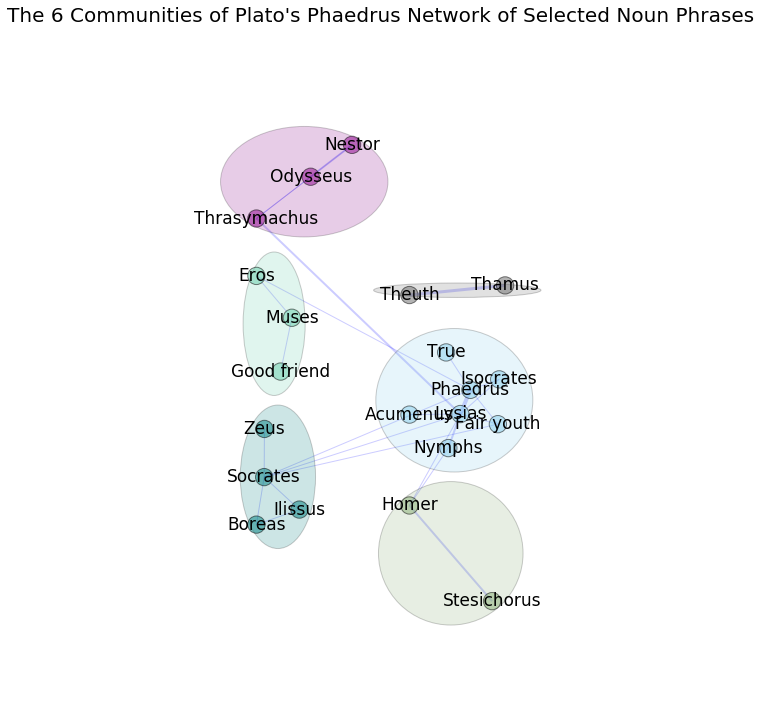

In [12]:
%autoreload 2

part,nodper=tool.print_communities(G,sstt)

d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=0.2
vcc={}
sstta="The %s Communities of %s Network of Selected Noun Phrases" %(max(part.values())+1,titlename)#sstt)

tool.draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=17,valpha=0.5)